# Gradient Boosting

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

source:https://en.wikipedia.org/wiki/Gradient_boosting

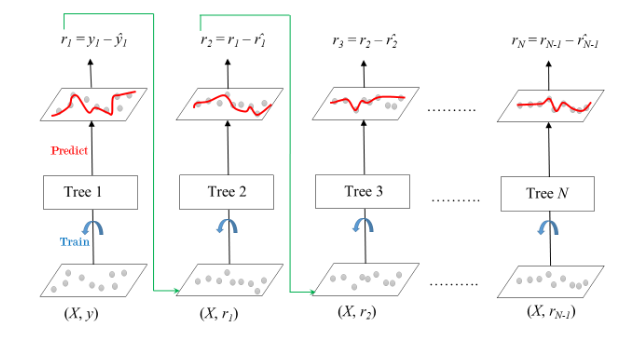

video：https://www.youtube.com/watch?v=en2bmeB4QUo

slides:https://docs.google.com/presentation/d/1aPUPNg1WKs13YKtbxbHlgeRhVWNFxBdyIZaMjlLPe8w/edit?usp=sharing

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics

In [36]:
df = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
X,y = df.drop('y',axis=1),df.y
kf = KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
    y_train,y_val = y.iloc[train_index],y.iloc[val_index],

In [38]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [39]:
gradient_booster.fit(X_train,y_train)
predict=gradient_booster.predict(X_val)
print(classification_report(y_val,predict))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        67

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



In [40]:
# create a matrix with classification predictions
confusion_matrix = metrics.confusion_matrix(y_val,gradient_booster.predict(X_val))
confusion_matrix

array([[43,  3],
       [ 1, 66]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Class')

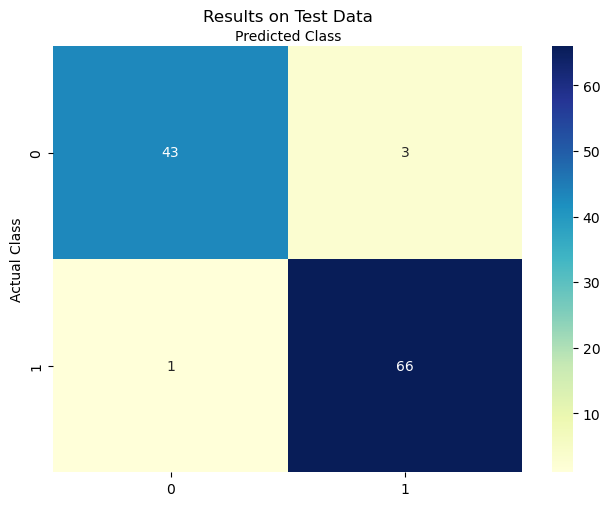

In [41]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

source：https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d

another interesting project: How to use the GradientBoostingClassifier to predict the 2022 World Cup

https://www.kaggle.com/code/sslp23/predicting-fifa-2022-world-cup-with-ml/notebook

Six Star Brazil！

# XGBoost

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

It’s vital to an understanding of XGBoost to first grasp the machine learning concepts and algorithms that XGBoost builds upon: supervised machine learning, decision trees, ensemble learning, and gradient boosting.

Supervised machine learning uses algorithms to train a model to find patterns in a dataset with labels and features and then uses the trained model to predict the labels on a new dataset’s features.

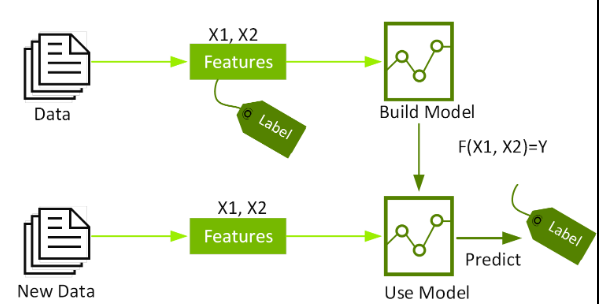

Decision trees create a model that predicts the label by evaluating a tree of if-then-else true/false feature questions, and estimating the minimum number of questions needed to assess the probability of making a correct decision. Decision trees can be used for classification to predict a category, or regression to predict a continuous numeric value. In the simple example below, a decision tree is used to estimate a house price (the label) based on the size and number of bedrooms (the features).

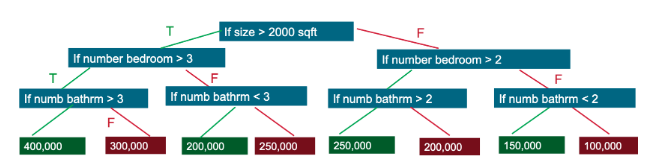

A Gradient Boosting Decision Trees (GBDT) is a decision tree ensemble learning algorithm similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model.

Both random forest and GBDT build a model consisting of multiple decision trees. The difference is in how the trees are built and combined.

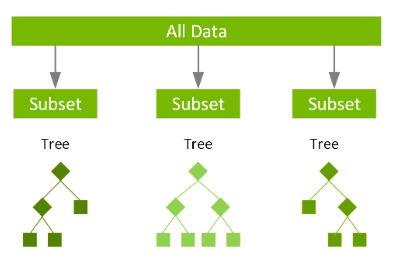

Random forest uses a technique called bagging to build full decision trees in parallel from random bootstrap samples of the data set. The final prediction is an average of all of the decision tree predictions.

The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. Gradient boosting is an extension of boosting where the process of additively generating weak models is formalized as a gradient descent algorithm over an objective function. Gradient boosting sets targeted outcomes for the next model in an effort to minimize errors. Targeted outcomes for each case are based on the gradient of the error (hence the name gradient boosting) with respect to the prediction.

GBDTs iteratively train an ensemble of shallow decision trees, with each iteration using the error residuals of the previous model to fit the next model. The final prediction is a weighted sum of all of the tree predictions. Random forest “bagging” minimizes the variance and overfitting, while GBDT “boosting” minimizes the bias and underfitting.

XGBoost is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed. With XGBoost, trees are built in parallel, instead of sequentially like GBDT. It follows a level-wise strategy, scanning across gradient values and using these partial sums to evaluate the quality of splits at every possible split in the training set. 

In [42]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")

data resource: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [44]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [45]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [46]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [48]:
predictions = model.predict(X_test)

In [58]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train, y_train)
predictions_gd = gradient_booster.predict(X_test)

In [59]:
accuracy = metrics.accuracy_score(y_test,predictions)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy))

Accuracy of the Decision Tree Classification Model: 74.02597402597402%


In [60]:
accuracy_dt = metrics.accuracy_score(y_test,predictions_gd)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy))

Accuracy of the Decision Tree Classification Model: 74.02597402597402%


In [33]:
# create a matrix with classification predictions
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
confusion_matrix

array([[81, 16],
       [24, 33]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Class')

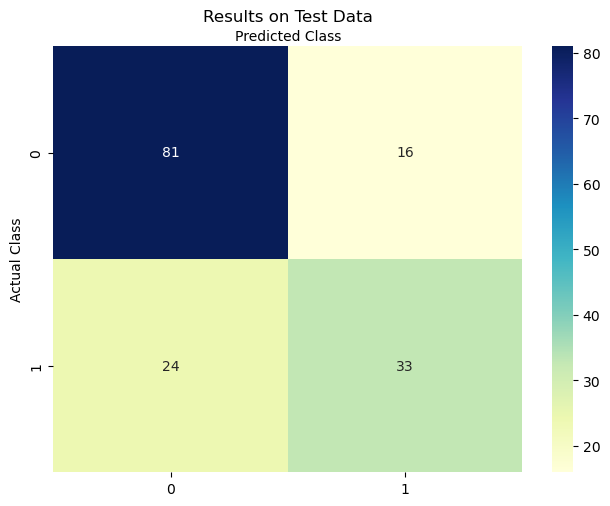

In [34]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

## Explainability of the XG Boost Model

Explainability in machine learning models is hard to quantify and test, but there are ways to make the model easier to understand.  In the next section, the SHAP model will be used to show what variables are affecting the outcomes of the model.

The example code being used is a data set on Loan applications.  The XG boost model will be used to decide who will recieve a loan, and the SHAP model will show how each variable affects this decision.

Data Set: https://www.kaggle.com/datasets/burak3ergun/loan-data-set

Associated Articles: 

https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16
https://www.kaggle.com/code/bryanb/xgboost-explainability-with-shap/notebook

In [295]:
#install SHAP into your terminal

#pip install shap

In [276]:
#Load the dataset
dataset_loan = 'loan_data_set.csv'
df = pd.read_csv(dataset_loan,usecols = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'])

In [277]:
#drop the null values
df1=df.dropna()

In [284]:
#Assign the catagorical variables integers
df1['Gender'].replace(['Male', 'Female'],
                        [0, 1])
df1['Education'].replace(['Not Graduate', 'Graduate'],
                        [0, 1])
df1['Married'].replace(['No', 'Yes'],
                        [0, 1])
df1['Self_Employed'].replace(['No', 'Yes'],
                        [0, 1])
df1['Property_Area'].replace(['Rural', 'SemiUrban','semiurban','Semiurban','Urban'],
                        [0, 1,1,1,2])
df1['Loan_Status'].replace(['N', 'Y'],
                        [0, 1])
df1['Dependents'].replace(['0', '1','2','3','3+'],
                        [0, 1,2,3,4])
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [285]:
#Split the data from predicter columns from target columns
X1 = df1.iloc[:, :-1]
Y1= df1.iloc[:, -1]


In [286]:
#Split the data into training and testing data
seed1 = 7
test_size1 = 0.33
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=test_size1, random_state=seed1)

In [288]:
model1 = XGBClassifier()
model1.fit(X_train1, y_train1)

[02:32:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [289]:
print(model1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [290]:
predictions1 = model1.predict(X_test1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [291]:
accuracy1 = metrics.accuracy_score(y_test1,predictions1)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy1))

Accuracy of the Decision Tree Classification Model: 71.69811320754717%


In [292]:
import shap
shap.initjs()

shap_explainer = shap.TreeExplainer(model1)
shap_values = shap_explainer.shap_values(X1)


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


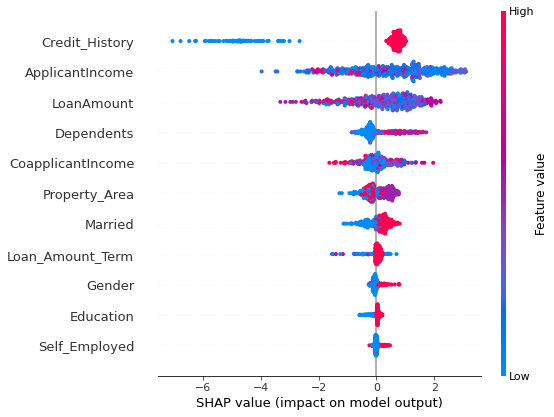

In [293]:
shap.summary_plot(shap_values, X1)

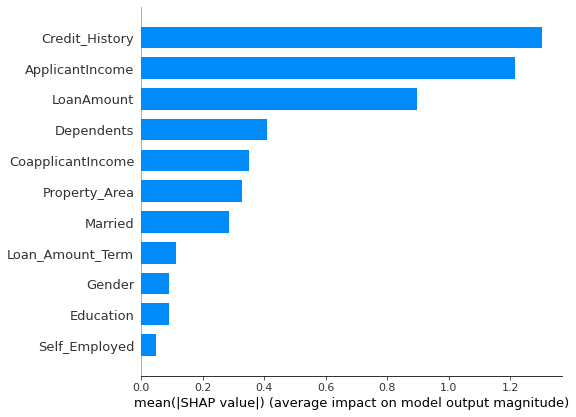

In [294]:
shap.summary_plot(shap_values, X1,plot_type="bar")

As seen above, the main factors affecting whether you will get approved for a loan is your credit history, income, and thhe ammount of the loan.  Also, comparitively, your Gender, Education level, aand self employement status does not haave a large affect on whether or not you are approved for a loan.

# AI in the Fabrics of Society

## Transperency, Explainability, and Accountability

As algorithms become more widely used in society, it is becoming more and more important for data scientists and companies to be able to explain how these algorithms are making decisions.  Accuracy of an algorithm is important, but transparency of a model is also important.  Whether it is ethical responsibility or legal regulation causing the necessity of model transparency, data scientists must develop ways to explain, to a certain extent, why the algorithm made a decision.

Typically, decision tree based models are easier to explain than neural networks, because it is sometimes possible to look through the tree and see what is happening. Using alternative tree based techniques like boosting and XGboosting leads to higher accuracy, but the explainability aspect becomes less clear.  

Boosting and specifically XGboosting is becoming more and more popular as it beats older methods in accuracy.  These models are being used to predict illness severity and risk of illness, and also being used to approve or disapprove loans and credit.  When these models are used for financial decisions for banks, banks ethically and sometimes legally must provide a reason for why they have been rejected.  When the models become more and more complex, it becomes harder to explain how the algorithm came to that conclusion.  This could lead to discrimination based on race and sex, and also lead to discrimination on other variables like marital status.   

In order to implement algorithms to make our jobs simpler, we must hold data scientists and engineers accountable for the bias and discrimination that can be found in the algorithms; also, we must hold corporations accountable for the use of these types of nontransparent models.  The accountability can be held by passing laws demanding a specific level of transparency, and spreading awareness of which companies are using unexplainable algorithms. 

President Biden and the Biden Administration released a blueprint for an AI bill of rights in 2022 stating “Notice and Explanation” as one of the top 5 rights Americans should have when it comes to algorithmic justice. The document lays out how companies and the state should implement algorithms and design laws in a way to guarantee the explainability and transparency of models.  Although this is not legally binding, it is a start on how governments can begin implementing laws to protect their citizens.  


### Sources

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

https://www.whitehouse.gov/ostp/ai-bill-of-rights/#notice